# Explore highly co-expressed genes
In the previous [notebook](2_explore_corr_of_genes.ipynb) we observed that using 39 samples with 201 PAO1-specific genes, that the correlation of accessory-accessory genes is higher compared to the correlation of core-core and core-accessory genes.

Based on this finding, we want to know: *What can explain this difference in correlation distribution?*

This notebook performs a follow-up analysis. In particular this notebook performs a deeper examination of the correlation structure per group (core-core, core-accessory, accessory-accessory) by looking at the trends of the nearest neighbors (i.e. highly correlated genes) of each gene.

In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from functions import calculations

np.random.seed(123)

/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Input
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

base_intermediate_dir = os.path.join(
    base_dir,
    "pilot_experiment",
    "data",
    "tmp")

core_gene_ids_file = os.path.join(
    base_intermediate_dir,
    "core_gene_ids.pickle")

acc_gene_ids_file = os.path.join(
    base_intermediate_dir,
    "acc_gene_ids.pickle")

real_all_corr_file = os.path.join(
    base_intermediate_dir,
    "real_all_corr.pickle")

shuffled_all_corr_file = os.path.join(
    base_intermediate_dir,
    "shuffled_all_corr.pickle")

# Import Pseudomonas operon annotations from ADAGE repo
# Original source of data is from DOOR
# https://github.com/greenelab/adage/blob/master/Genome_organization/operon_3.txt
# Operons containing at least 3 genes
operon_file = "https://github.com/greenelab/adage/blob/master/Genome_organization/operon_3.txt"

In [3]:
# Read in gene ids
core_gene_ids = pickle.load(open(core_gene_ids_file, "rb"))
acc_gene_ids = pickle.load(open(acc_gene_ids_file, "rb"))

# Get number of core and accessory genes
num_core_genes = len(core_gene_ids)
num_acc_genes = len(acc_gene_ids)
num_all_genes = num_core_genes + num_acc_genes

# Extract statistics about co-expression from correlation matrix

In [4]:
# Define threshold for highly co-expressed genes
coexpression_threshold = 0.9

### Co-expression statsitics using real data

In [5]:
# Get co-expression patterns using real expression data
real_core_df, real_acc_df = calculations.get_coexpression_stats(real_all_corr_file,
                                                                operon_file,
                                                                core_gene_ids_file,
                                                                acc_gene_ids_file,
                                                                coexpression_threshold)

In [6]:
real_core_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0001,PA0001,0,0,0,0.0,0.0,0,0,0,0.0,0.0
PA0002,PA0002,7,7,0,1.0,0.0,7,7,0,1.0,0.0
PA0003,PA0003,1,1,0,1.0,0.0,1,1,0,1.0,0.0
PA0004,PA0004,8,8,0,1.0,0.0,8,8,0,1.0,0.0
PA0005,PA0005,0,0,0,0.0,0.0,0,0,0,0.0,0.0


In [7]:
real_acc_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0053,PA0053,22,6,16,0.272727,0.727273,22,6,16,0.272727,0.727273
PA0095,PA0095,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000
PA0100,PA0100,23,7,16,0.304348,0.695652,23,7,16,0.304348,0.695652
PA0135,PA0135,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000
PA0187,PA0187,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000


### Co-expression statistics using shuffled data

In [8]:
# Get co-expression patterns using shuffled expression data (control)
shuffled_core_df, shuffled_acc_df = calculations.get_coexpression_stats(shuffled_all_corr_file,
                                                                operon_file,
                                                                core_gene_ids_file,
                                                                acc_gene_ids_file,
                                                                coexpression_threshold)

shuffled_core_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0001,PA0001,0,0,0,0,0,0,0,0,0,0
PA0002,PA0002,0,0,0,0,0,0,0,0,0,0
PA0003,PA0003,0,0,0,0,0,0,0,0,0,0
PA0004,PA0004,0,0,0,0,0,0,0,0,0,0
PA0005,PA0005,0,0,0,0,0,0,0,0,0,0


In [9]:
shuffled_acc_df.head()

,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0053,PA0053,0,0,0,0,0,0,0,0,0,0
PA0095,PA0095,0,0,0,0,0,0,0,0,0,0
PA0100,PA0100,0,0,0,0,0,0,0,0,0,0
PA0135,PA0135,0,0,0,0,0,0,0,0,0,0
PA0187,PA0187,0,0,0,0,0,0,0,0,0,0


# Plot trends in co-expression data

### Number of co-expressed genes

Text(0, 0.5, 'Density')

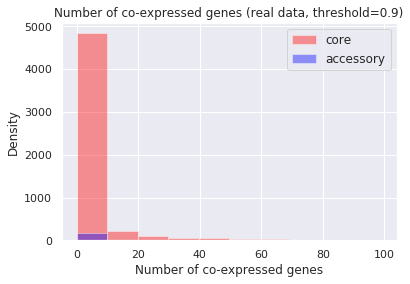

In [10]:
# Get bins using all data
hist, bins_num_coexpressed_real = np.histogram(np.concatenate([real_core_df['num_coexpressed_genes'].values,
                                                               real_acc_df['num_coexpressed_genes'].values]))

# Distribution of number of co-expressed genes in real data
sns.set()
sns.distplot(real_core_df['num_coexpressed_genes'].tolist(), 
             label='core',
             color='red',
             kde=False,
             bins=bins_num_coexpressed_real)

sns.distplot(real_acc_df['num_coexpressed_genes'].tolist(), 
             label='accessory',
             color='blue',
             kde=False,
             bins=bins_num_coexpressed_real)

plt.legend(prop={'size': 12})
plt.title('Number of co-expressed genes (real data, threshold={})'.format(coexpression_threshold))
plt.xlabel('Number of co-expressed genes')
plt.ylabel('Density')

### Number of nonzero co-expressed genes

Text(0, 0.5, 'Density')

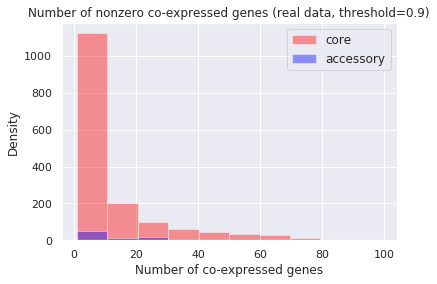

In [11]:
## Remove genes with 0 co-expressed genes
# Get bins using all data
hist, bins_num_coexpressed_real_nonzero = np.histogram(np.concatenate(
    [real_core_df[real_core_df['num_coexpressed_genes']>0]['num_coexpressed_genes'].values,
     real_acc_df[real_acc_df['num_coexpressed_genes']>0]['num_coexpressed_genes'].values]))

# Distribution of number of co-expressed genes in real data
sns.distplot(real_core_df[real_core_df['num_coexpressed_genes']>0]['num_coexpressed_genes'].tolist(), 
             label='core',
             color='red',
             kde=False,
             bins=bins_num_coexpressed_real_nonzero)

sns.distplot(real_acc_df[real_acc_df['num_coexpressed_genes']>0]['num_coexpressed_genes'].tolist(), 
             label='accessory',
             color='blue',
             kde=False,
             bins=bins_num_coexpressed_real_nonzero)

plt.legend(prop={'size': 12})
plt.title('Number of nonzero co-expressed genes (real data, threshold={})'.format(coexpression_threshold))
plt.xlabel('Number of co-expressed genes')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

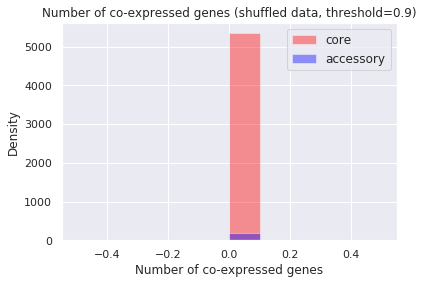

In [12]:
# Get bins using all data
hist, bins_num_coexpressed_shuffled = np.histogram(np.concatenate([shuffled_core_df['num_coexpressed_genes'].values,
                                                                   shuffled_acc_df['num_coexpressed_genes'].values]))

# Distribution of number of co-expressed genes in shuffled data
sns.distplot(shuffled_core_df['num_coexpressed_genes'].tolist(), 
             label='core',
             color='red',
             kde=False,
             bins=bins_num_coexpressed_shuffled)

sns.distplot(shuffled_acc_df['num_coexpressed_genes'].tolist(), 
             label='accessory', 
             color='blue',
             kde=False,
             bins=bins_num_coexpressed_shuffled)

plt.legend(prop={'size': 12})
plt.title('Number of co-expressed genes (shuffled data, threshold={})'.format(coexpression_threshold))
plt.xlabel('Number of co-expressed genes')
plt.ylabel('Density')

In [13]:
# Print statistics about co-expressed genes
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- For a given CORE gene, there is a median of {} co-expressed  genes'.
      format(np.median(real_core_df['num_coexpressed_genes'])))
print('- For a given ACCESSORY gene, there is a median of {} co-expressed  genes \n'.
      format(np.median(real_acc_df['num_coexpressed_genes'])))

# For shuffled data
print('Using a threshold of {} to define co-expression (shuffled data): \n'.
     format(coexpression_threshold))
print('- For a given CORE gene, there is a median of {} co-expressed  genes'.
      format(np.median(shuffled_core_df['num_coexpressed_genes'])))
print('- For a given ACCESSORY gene, there is a median of {} co-expressed  genes'.
      format(np.median(shuffled_acc_df['num_coexpressed_genes'])))

Using a threshold of 0.9 to define co-expression (real data): 

- For a given CORE gene, there is a median of 0.0 co-expressed  genes
- For a given ACCESSORY gene, there is a median of 0.0 co-expressed  genes 

Using a threshold of 0.9 to define co-expression (shuffled data): 

- For a given CORE gene, there is a median of 0.0 co-expressed  genes
- For a given ACCESSORY gene, there is a median of 0.0 co-expressed  genes


**Observation:**
* Many core and accessory genes are not co-expressed with other genes or very few genes, as expected
* As increase threshold (more stringent), there are fewer co-expressed genes, as expected
* (control, not shown) All genes (threshold=0.75,0.9) are independent, as expected, since we have destroyed relationships between genes when we shuffled

### Percent of co-expressed genes that are NOT in the same operon

In [14]:
# Calculate the percent of co-expressed genes that are non co-operonic (real data)
real_percent_non_cooperonic_coexpressed_core_genes = (
    real_core_df['num_non_cooperonic_coexpressed_genes']/real_core_df['num_coexpressed_genes'])

real_percent_non_cooperonic_coexpressed_acc_genes = (
    real_acc_df['num_non_cooperonic_coexpressed_genes']/real_acc_df['num_coexpressed_genes'])

# There are NaNs in cases where there are 0 co-expressed genes and therefore 0 non-cooperonic genes
real_num_core_na = real_percent_non_cooperonic_coexpressed_core_genes.isna().sum()
real_num_acc_na = real_percent_non_cooperonic_coexpressed_acc_genes.isna().sum()

# Since we are concerned with "of those co-expressed genes how many are in NOT in the same operon", we will remove these
real_percent_non_cooperonic_coexpressed_core_genes_noNa = real_percent_non_cooperonic_coexpressed_core_genes.dropna(inplace=False)
real_percent_non_cooperonic_coexpressed_acc_genes_noNa = real_percent_non_cooperonic_coexpressed_acc_genes.dropna(inplace=False)

Text(0, 0.5, 'Density')

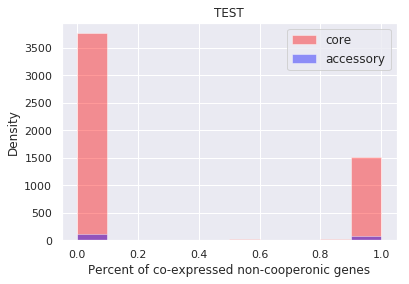

In [15]:
## TEST: What does distribution look like before removing NaNs?

# Get bins using all data
hist, bins_num_percent_non_cooperonic_real = np.histogram(
    np.concatenate(
        [real_percent_non_cooperonic_coexpressed_core_genes.fillna(0),
         real_percent_non_cooperonic_coexpressed_acc_genes.fillna(0)]
    )
)
# Distribution of percent of co-expressed genes that are NOT co-operonic in real data
sns.distplot(real_percent_non_cooperonic_coexpressed_core_genes.fillna(0),
             label='core',
             color='red',
             kde=False,
             bins=bins_num_percent_non_cooperonic_real)
sns.distplot(real_percent_non_cooperonic_coexpressed_acc_genes.fillna(0), 
             label='accessory',
             color='blue',
             kde=False, 
             bins=bins_num_percent_non_cooperonic_real)

plt.legend(prop={'size': 12})
plt.title('TEST'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

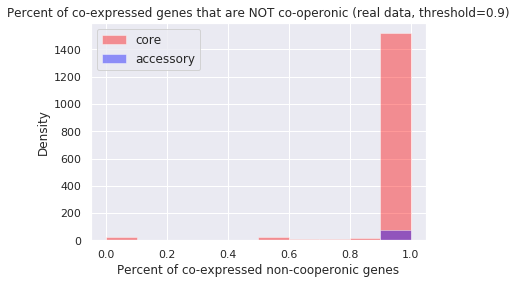

In [16]:
# Get bins using all data
hist, bins_num_percent_non_cooperonic_real = np.histogram(
    np.concatenate(
        [real_percent_non_cooperonic_coexpressed_core_genes_noNa,
         real_percent_non_cooperonic_coexpressed_acc_genes_noNa]
    )
)

# Distribution of percent of co-expressed genes that are NOT co-operonic in real data
sns.distplot(real_percent_non_cooperonic_coexpressed_core_genes_noNa,
             label='core',
             color='red',
             kde=False,
             bins=bins_num_percent_non_cooperonic_real)
sns.distplot(real_percent_non_cooperonic_coexpressed_acc_genes_noNa, 
             label='accessory',
             color='blue', 
             kde=False,
             bins=bins_num_percent_non_cooperonic_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed genes that are NOT co-operonic (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes')
plt.ylabel('Density')

In [17]:
# Calculate the percent of co-expressed genes that are non co-operonic (shuffled data)
shuffled_percent_non_cooperonic_coexpressed_core_genes = (
    shuffled_core_df['num_non_cooperonic_coexpressed_genes']/shuffled_core_df['num_coexpressed_genes'])

shuffled_percent_non_cooperonic_coexpressed_acc_genes = (
    shuffled_acc_df['num_non_cooperonic_coexpressed_genes']/shuffled_acc_df['num_coexpressed_genes'])

# There are NaNs in cases where there are 0 co-expressed genes and therefore 0 non-cooperonic genes
shuffled_num_core_na = shuffled_percent_non_cooperonic_coexpressed_core_genes.isna().sum()
shuffled_num_acc_na = shuffled_percent_non_cooperonic_coexpressed_acc_genes.isna().sum()

# Since we are concerned with "of those co-expressed genes how many are in NOT in the same operon", we will remove these
shuffled_percent_non_cooperonic_coexpressed_core_genes_noNa = shuffled_percent_non_cooperonic_coexpressed_core_genes.dropna(
    inplace=False)
shuffled_percent_non_cooperonic_coexpressed_acc_genes_noNa = shuffled_percent_non_cooperonic_coexpressed_acc_genes.dropna(
    inplace=False)

Text(0, 0.5, 'Density')

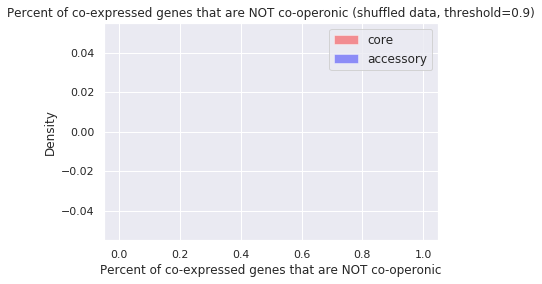

In [18]:
# Get bins using all data
hist, bins_num_percent_non_cooperonic_shuffled = np.histogram(
    np.concatenate([shuffled_percent_non_cooperonic_coexpressed_core_genes_noNa,
                    shuffled_percent_non_cooperonic_coexpressed_acc_genes_noNa]))

# Distribution of percent of co-expressed genes that are NOT co-operonic in shuffled data
sns.distplot(shuffled_percent_non_cooperonic_coexpressed_core_genes_noNa,
             label='core',
             color='red',
             kde=False,
             bins=bins_num_percent_non_cooperonic_shuffled)
sns.distplot(shuffled_percent_non_cooperonic_coexpressed_acc_genes_noNa, 
             label='accessory',
             color='blue', 
             kde=False,
             bins=bins_num_percent_non_cooperonic_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed genes that are NOT co-operonic (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed genes that are NOT co-operonic')
plt.ylabel('Density')

In [19]:
# Print statistics about non co-operonic co-expressed genes
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes'.
      format(real_num_core_na, round((real_num_core_na/num_core_genes)*100,2)))
print('''- Of those remaining genes, for a given CORE gene, 
      {}% (median) of the co-expressed genes are NOT in a shared operon'''.
      format(round(np.median(real_percent_non_cooperonic_coexpressed_core_genes_noNa)*100,2)))

print('- We removed {} ({}%) genes that had 0 co-expressed genes'.
      format(real_num_acc_na, round(real_num_acc_na/num_acc_genes)*100,2))
print('''- Of those remaining genes, for a given ACCESSORY gene, 
     {}% (median) of the co-expressed genes are NOT in a shared operon \n'''.
      format(round(np.median(real_percent_non_cooperonic_coexpressed_acc_genes_noNa)*100,2)))


# For shuffled data
print('Using a threshold of {} to define co-expression (shuffled data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes'.
      format(shuffled_num_core_na, round((shuffled_num_core_na/num_core_genes)*100,2)))
print('''- Of those remaining genes, for a given CORE gene, 
      {}% (median) of the co-expressed genes are NOT in a shared operon'''.
      format(round(np.median(shuffled_percent_non_cooperonic_coexpressed_core_genes_noNa)*100,2)))

print('- We removed {} ({}%) genes that had 0 co-expressed genes'.
      format(shuffled_num_acc_na, round((shuffled_num_acc_na/num_acc_genes)*100,2)))
print('''- Of those remaining genes, for a given ACCESSORY gene, 
     {}% (median) of the co-expressed genes are NOT in a shared operon'''.
      format(round(np.median(shuffled_percent_non_cooperonic_coexpressed_acc_genes_noNa)*100,2)))

Using a threshold of 0.9 to define co-expression (real data): 

- We removed 3743 (69.99%) genes that had 0 co-expressed genes
- Of those remaining genes, for a given CORE gene, 
      100.0% (median) of the co-expressed genes are NOT in a shared operon
- We removed 116 (100.0%) genes that had 0 co-expressed genes
- Of those remaining genes, for a given ACCESSORY gene, 
     100.0% (median) of the co-expressed genes are NOT in a shared operon 

Using a threshold of 0.9 to define co-expression (shuffled data): 

- We removed 5348 (100.0%) genes that had 0 co-expressed genes
- Of those remaining genes, for a given CORE gene, 
      nan% (median) of the co-expressed genes are NOT in a shared operon
- We removed 201 (100.0%) genes that had 0 co-expressed genes
- Of those remaining genes, for a given ACCESSORY gene, 
     nan% (median) of the co-expressed genes are NOT in a shared operon


/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/alexandra/anaconda3/envs/core-acc/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Observations:**
* For majority of core genes, their co-expressed genes are not in the same operon. For example if core gene A is co-expressed with genes {X,Y,Z} and A is in operon {A,B,C} there are no intersecting genes. 
* This is the case for most core and accessory genes. There are few co-expression gene sets that overlap with known operons.
* I would've expected more co-expressed genes to overlap with operons but need to read more about *P. aeruginosa* gene-gene interactions to get more of an intuition.
* Good to see that as you decrease the threshold there are more non co-operonic gene co-expressed gene sets.
* (control) There are 0 non-cooperonic co-expressed genes since there are 0 co-expressed genes

### Core gene relationships
For a given core gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are core?
Similarly, for a given accessory gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are core? 

In [20]:
# We only want to consider those genes with some co-expressed genes
real_core_nan_ids = list(
    real_percent_non_cooperonic_coexpressed_core_genes[real_percent_non_cooperonic_coexpressed_core_genes.isna()].index)
real_acc_nan_ids = list(
    real_percent_non_cooperonic_coexpressed_acc_genes[real_percent_non_cooperonic_coexpressed_acc_genes.isna()].index)

# We also only want to consider only those with some non-cooperonic genes
real_core_zero_ids = list(real_core_df[real_core_df['num_non_cooperonic_coexpressed_genes'] == 0].index)
real_acc_zero_ids = list(real_acc_df[real_acc_df['num_non_cooperonic_coexpressed_genes'] == 0].index)

# Get the union of excluded gene ids
real_exclude_core_ids = set(real_core_zero_ids).union(real_core_nan_ids)
real_exclude_acc_ids = set(real_acc_zero_ids).union(real_acc_nan_ids)

# Since we are concerned with "of those co-expressed gene NOT in the same operon", we will remove the above ids
real_percent_core_with_refcore = real_core_df['percent_non_cooperonic_coexpressed_core'].drop(labels=real_exclude_core_ids)
real_percent_core_with_refacc = real_acc_df['percent_non_cooperonic_coexpressed_core'].drop(labels=real_exclude_acc_ids)

Text(0, 0.5, 'Density')

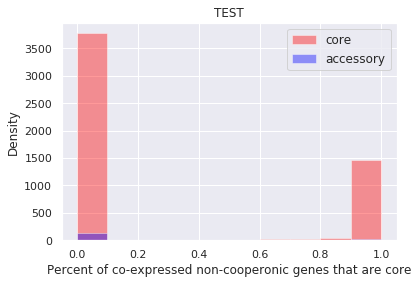

In [21]:
## Test: Distribution without removing 0 expressed and 0 non co-operonic genes

# Get bins using all data
hist, bins_core_real = np.histogram(np.concatenate([real_core_df['percent_non_cooperonic_coexpressed_core'].values,
                                                    real_acc_df['percent_non_cooperonic_coexpressed_core'].values]))

# Distribution plot for percent of core co-expressed genes in real data
sns.distplot(real_core_df['percent_non_cooperonic_coexpressed_core'].tolist(),
             label='core', 
             color='red',
             kde=False,
             bins=bins_core_real)
sns.distplot(real_acc_df['percent_non_cooperonic_coexpressed_core'].tolist(),
             label='accessory',
             color='blue',
             kde=False,
             bins=bins_core_real)

plt.legend(prop={'size': 12})
plt.title('TEST'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are core')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

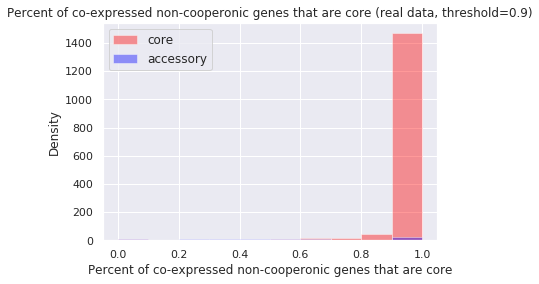

In [22]:
# Get bins using all data
hist, bins_core_real = np.histogram(np.concatenate([real_percent_core_with_refcore.values,
                                                    real_percent_core_with_refacc.values]))

# Distribution plot for percent of core co-expressed genes in real data
sns.distplot(real_percent_core_with_refcore.tolist(),
             label='core', 
             color='red',
             kde=False,
             bins=bins_core_real)
sns.distplot(real_percent_core_with_refacc.tolist(),
             label='accessory',
             color='blue',
             kde=False,
             bins=bins_core_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are core (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are core')
plt.ylabel('Density')

In [23]:
# We only want to consider those genes with some co-expressed genes
shuffled_core_nan_ids = list(
    shuffled_percent_non_cooperonic_coexpressed_core_genes[
        shuffled_percent_non_cooperonic_coexpressed_core_genes.isna()].index)
shuffled_acc_nan_ids = list(
    shuffled_percent_non_cooperonic_coexpressed_acc_genes[
        shuffled_percent_non_cooperonic_coexpressed_acc_genes.isna()].index)

# We also only want to consider only those with some non-cooperonic genes
shuffled_core_zero_ids = list(shuffled_core_df[shuffled_core_df['num_non_cooperonic_coexpressed_genes'] == 0].index)
shuffled_acc_zero_ids = list(shuffled_acc_df[shuffled_acc_df['num_non_cooperonic_coexpressed_genes'] == 0].index)

# Get the union of excluded gene ids
shuffled_exclude_core_ids = set(shuffled_core_zero_ids).union(shuffled_core_nan_ids)
shuffled_exclude_acc_ids = set(shuffled_acc_zero_ids).union(shuffled_acc_nan_ids)

# Since we are concerned with "of those co-expressed gene NOT in the same operon", we will remove the above ids
shuffled_percent_core_with_refcore = shuffled_core_df['percent_non_cooperonic_coexpressed_core'].drop(labels=shuffled_exclude_core_ids)
shuffled_percent_core_with_refacc = shuffled_acc_df['percent_non_cooperonic_coexpressed_core'].drop(labels=shuffled_exclude_acc_ids)

Text(0, 0.5, 'Density')

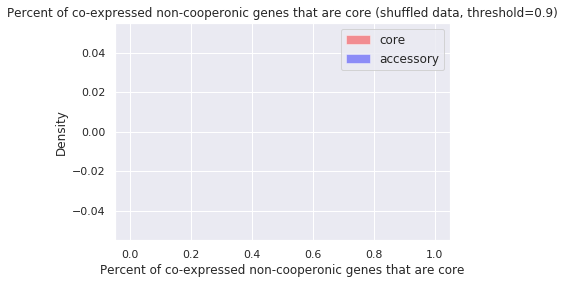

In [24]:
# Get bins using all data
hist, bins_core_shuffled = np.histogram(
    np.concatenate([shuffled_percent_core_with_refcore.values,
                    shuffled_percent_core_with_refacc.values]))

# Distribution plot for percent of core co-expressed genes in shuffled data
sns.distplot(shuffled_percent_core_with_refcore.tolist(), 
             label='core', 
             color='red',
             kde=False,
             bins=bins_core_shuffled)
sns.distplot(shuffled_percent_core_with_refacc.tolist(),
             label='accessory', 
             color='blue',
             kde=False,
             bins=bins_core_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are core (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are core')
plt.ylabel('Density')

In [25]:
# Print statistics about non co-operonic co-expressed core genes
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(real_exclude_core_ids), round((len(real_exclude_core_ids)/num_core_genes)*100,2)))
print('''- Of the non-coperonic co-expressed genes, for a given CORE gene,
      {}% (median) of co-expressed non co-operonic genes are core genes'''.
      format(round(np.median(real_percent_core_with_refcore)*100,2)))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(real_exclude_acc_ids), round((len(real_exclude_acc_ids)/num_acc_genes)*100,2)))
print('''- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      {}% (median) of co-expressed non co-operonic genes are core genes'''.
      format(round(np.median(real_percent_core_with_refacc)*100,2)))

# shuffled data
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(shuffled_exclude_core_ids), round((len(shuffled_exclude_core_ids)/num_core_genes)*100,2)))
print('''- Of the non-coperonic co-expressed genes, for a given CORE gene,
      {}% (median) of co-expressed non co-operonic genes are core genes'''.
      format(round(np.median(shuffled_percent_core_with_refcore)*100,2)))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(shuffled_exclude_acc_ids), round((len(shuffled_exclude_acc_ids)/num_acc_genes)*100,2)))
print('''- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      {}% (median) of co-expressed non co-operonic genes are core genes'''.
      format(round(np.median(shuffled_percent_core_with_refacc)*100,2)))

Using a threshold of 0.9 to define co-expression (real data): 

- We removed 3767 (70.44%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given CORE gene,
      100.0% (median) of co-expressed non co-operonic genes are core genes
- We removed 118 (58.71%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      60.0% (median) of co-expressed non co-operonic genes are core genes
Using a threshold of 0.9 to define co-expression (real data): 

- We removed 5348 (100.0%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given CORE gene,
      nan% (median) of co-expressed non co-operonic genes are core genes
- We removed 201 (100.0%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      nan% (median) of

### Accessory gene relationships
For a given core gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are accessory?
Similarly, for a given accessory gene, there exists a set of genes that are co-expressed with it. What percent of those co-expressed genes are accessory? 

In [26]:
# Since we are concerned with "of those co-expressed gene NOT in the same operon", we will remove the above ids
real_percent_acc_with_refcore = real_core_df['percent_non_cooperonic_coexpressed_acc'].drop(labels=real_exclude_core_ids)
real_percent_acc_with_refacc = real_acc_df['percent_non_cooperonic_coexpressed_acc'].drop(labels=real_exclude_acc_ids)

Text(0, 0.5, 'Density')

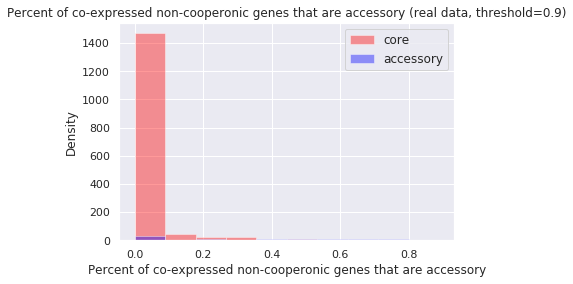

In [27]:
# Get bins using all data
hist, bins_acc_real = np.histogram(np.concatenate([real_percent_acc_with_refcore.values,
                                                   real_percent_acc_with_refacc.values]))

# Distribution plot for percent of accessory co-expressed genes in real data
sns.distplot(real_percent_acc_with_refcore.tolist(),
             label='core', 
             color='red', 
             kde=False,
             bins=bins_acc_real)

sns.distplot(real_percent_acc_with_refacc.tolist(),
             label='accessory',
             color='blue', 
             kde=False,
             bins=bins_acc_real)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are accessory (real data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are accessory')
plt.ylabel('Density')

In [28]:
# Since we are concerned with "of those co-expressed gene NOT in the same operon", we will remove the above ids
shuffled_percent_acc_with_refcore = shuffled_core_df['percent_non_cooperonic_coexpressed_acc'].drop(labels=shuffled_exclude_core_ids)
shuffled_percent_acc_with_refacc = shuffled_acc_df['percent_non_cooperonic_coexpressed_acc'].drop(labels=shuffled_exclude_acc_ids)

Text(0, 0.5, 'Density')

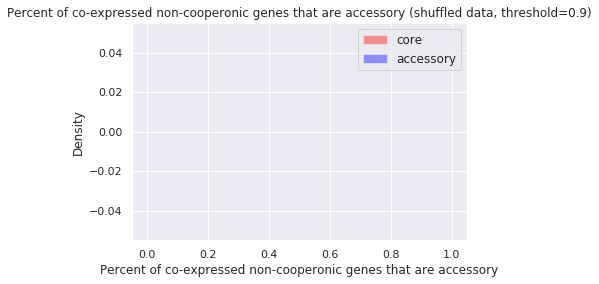

In [29]:
# Get bins using all data
hist, bins_acc_shuffled = np.histogram(
    np.concatenate([shuffled_percent_acc_with_refcore.values,
                    shuffled_percent_acc_with_refacc.values]))

# Distribution plot for percent of accessory co-expressed genes in shuffled data
sns.distplot(shuffled_percent_acc_with_refcore.tolist(), 
             label='core', 
             color='red',
             kde=False,
             bins=bins_acc_shuffled)
sns.distplot(shuffled_percent_acc_with_refacc.tolist(), 
             label='accessory', 
             color='blue', 
             kde=False,
             bins=bins_acc_shuffled)

plt.legend(prop={'size': 12})
plt.title('Percent of co-expressed non-cooperonic genes that are accessory (shuffled data, threshold={})'.
          format(coexpression_threshold))
plt.xlabel('Percent of co-expressed non-cooperonic genes that are accessory')
plt.ylabel('Density')

In [30]:
# Print statistics about non co-operonic co-expressed accessory genes
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(real_exclude_core_ids), round((len(real_exclude_core_ids)/num_core_genes)*100,2)))
print('''- Of the non-coperonic co-expressed genes, for a given CORE gene,
      {}% (median) of co-expressed non co-operonic genes are accessory genes'''.
      format(round(np.median(real_percent_acc_with_refcore)*100,2)))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(real_exclude_acc_ids), round((len(real_exclude_acc_ids)/num_acc_genes)*100,2)))
print('''- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      {}% (median) of co-expressed non co-operonic genes are accessory genes'''.
      format(round(np.median(real_percent_acc_with_refacc)*100,2)))

# shuffled data
print('Using a threshold of {} to define co-expression (real data): \n'.
     format(coexpression_threshold))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(shuffled_exclude_core_ids), round((len(shuffled_exclude_core_ids)/num_core_genes)*100,2)))
print('''- Of the non-coperonic co-expressed genes, for a given CORE gene,
      {}% (median) of co-expressed non co-operonic genes are accessory genes'''.
      format(round(np.median(shuffled_percent_acc_with_refcore)*100,2)))
print('- We removed {} ({}%) genes that had 0 co-expressed genes or 0 non-cooperonic genes'.
      format(len(shuffled_exclude_acc_ids), round((len(shuffled_exclude_acc_ids)/num_acc_genes)*100,2)))
print('''- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      {}% (median) of co-expressed non co-operonic genes are accessory genes'''.
      format(round(np.median(shuffled_percent_acc_with_refacc)*100,2)))

Using a threshold of 0.9 to define co-expression (real data): 

- We removed 3767 (70.44%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given CORE gene,
      0.0% (median) of co-expressed non co-operonic genes are accessory genes
- We removed 118 (58.71%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      33.33% (median) of co-expressed non co-operonic genes are accessory genes
Using a threshold of 0.9 to define co-expression (real data): 

- We removed 5348 (100.0%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given CORE gene,
      nan% (median) of co-expressed non co-operonic genes are accessory genes
- We removed 201 (100.0%) genes that had 0 co-expressed genes or 0 non-cooperonic genes
- Of the non-coperonic co-expressed genes, for a given ACCESSORY gene,
      na

**Observation:**
* Core genes tend to be co-expressed with **only** other core genes
* Many accessory genes tend to be co-expressed with **only** other core genes, 
* Some accessory genes are co-expressed with mix of accessory genes, core genes
* (control) There are no relationships between core-core, core-accessory, accessory-accessory

# Manually examine co-expressed and co-operonic genes

In [31]:
# Get genes where the number of co-expressed genes > 0 AND number of non-operonic genes is 0 
# Meaning that all the co-expressed genes are in the same operon
real_refcore_cooperonic = real_core_df[
    (real_core_df['num_coexpressed_genes'] > 0) & (real_core_df['num_non_cooperonic_coexpressed_genes'] == 0)]

print(real_refcore_cooperonic.shape)
real_refcore_cooperonic.head(10)

(24, 11)


,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0637,PA0637,2,2,0,1.0,0.0,0,0,0,0.0,0.0
PA1893,PA1893,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA1987,PA1987,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA2328,PA2328,2,2,0,1.0,0.0,0,0,0,0.0,0.0
PA2339,PA2339,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA2404,PA2404,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA3188,PA3188,1,1,0,1.0,0.0,0,0,0,0.0,0.0
PA3328,PA3328,5,5,0,1.0,0.0,0,0,0,0.0,0.0
PA3330,PA3330,3,3,0,1.0,0.0,0,0,0,0.0,0.0
PA3331,PA3331,2,2,0,1.0,0.0,0,0,0,0.0,0.0


In [32]:
real_refacc_cooperonic = real_acc_df[
    (real_acc_df['num_coexpressed_genes'] > 0) & (real_acc_df['num_non_cooperonic_coexpressed_genes'] == 0)]

print(real_refacc_cooperonic.shape)
real_refacc_cooperonic.head(10)

(2, 11)


,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA2233,PA2233,3,2,1,0.666667,0.333333,0,0,0,0.0,0.0
PA3153,PA3153,1,0,1,0.000000,0.000000,0,0,0,0.0,0.0


In [33]:
# Manually select core reference gene and co-expressed gene set that is 100% co-operonic
# Read in correlation matrix
real_all_corr = pickle.load(open(real_all_corr_file, "rb"))

real_all_corr[real_all_corr.loc['PA1216']>coexpression_threshold]['PA1216']

PA1216    1.000000
PA1217    0.903066
Name: PA1216, dtype: float64

Manually selected PA1216. PA1216 is in operon containing PA1216 - PA1221 genes (http://3.209.27.103/feature/show/?id=105200&view=operons)


In [34]:
# Get genes where the number of co-expressed genes > 0 AND number of non-operonic genes > 0 
# Meaning that all the co-expressed genes are in the same operon
real_refcore_cooperonic = real_core_df[
    (real_core_df['num_coexpressed_genes'] > 0) & (real_core_df['num_non_cooperonic_coexpressed_genes'] > 0)]

print(real_refcore_cooperonic.shape)
real_refcore_cooperonic.head(10)

(1581, 11)


,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0002,PA0002,7,7,0,1.000000,0.000000,7,7,0,1.000000,0.000000
PA0003,PA0003,1,1,0,1.000000,0.000000,1,1,0,1.000000,0.000000
PA0004,PA0004,8,8,0,1.000000,0.000000,8,8,0,1.000000,0.000000
PA0006,PA0006,13,13,0,1.000000,0.000000,13,13,0,1.000000,0.000000
PA0009,PA0009,1,1,0,1.000000,0.000000,1,1,0,1.000000,0.000000
PA0011,PA0011,13,12,1,0.923077,0.076923,13,12,1,0.923077,0.076923
PA0012,PA0012,7,7,0,1.000000,0.000000,7,7,0,1.000000,0.000000
PA0017,PA0017,2,2,0,1.000000,0.000000,2,2,0,1.000000,0.000000
PA0019,PA0019,10,10,0,1.000000,0.000000,10,10,0,1.000000,0.000000
PA0020,PA0020,7,7,0,1.000000,0.000000,7,7,0,1.000000,0.000000


In [35]:
real_refacc_cooperonic = real_acc_df[
    (real_acc_df['num_coexpressed_genes'] > 0) & (real_acc_df['num_non_cooperonic_coexpressed_genes'] > 0)]

print(real_refacc_cooperonic.shape)
real_refacc_cooperonic.head(10)

(83, 11)


,ref_gene,num_coexpressed_genes,num_coexpressed_core,num_coexpressed_acc,percent_coexpressed_core,percent_coexpressed_acc,num_non_cooperonic_coexpressed_genes,num_non_cooperonic_coexpressed_core,num_non_cooperonic_coexpressed_acc,percent_non_cooperonic_coexpressed_core,percent_non_cooperonic_coexpressed_acc
PA0053,PA0053,22,6,16,0.272727,0.727273,22,6,16,0.272727,0.727273
PA0100,PA0100,23,7,16,0.304348,0.695652,23,7,16,0.304348,0.695652
PA0202,PA0202,2,2,0,1.000000,0.000000,2,2,0,1.000000,0.000000
PA0257,PA0257,10,0,10,0.000000,0.000000,10,0,10,0.000000,0.000000
PA0258,PA0258,36,8,28,0.222222,0.777778,36,8,28,0.222222,0.777778
PA0445,PA0445,20,6,14,0.300000,0.700000,20,6,14,0.300000,0.700000
PA0453,PA0453,80,77,3,0.962500,0.037500,80,77,3,0.962500,0.037500
PA0644,PA0644,6,4,2,0.666667,0.333333,6,4,2,0.666667,0.333333
PA0712,PA0712,8,8,0,1.000000,0.000000,8,8,0,1.000000,0.000000
PA0715,PA0715,3,0,3,0.000000,0.000000,3,0,3,0.000000,0.000000


In [36]:
# what does it say in literature, should they be in operon
# Manually select core reference gene and co-expressed gene set that is 100% non co-operonic

real_all_corr.loc['PA0001', real_all_corr.loc['PA0001']>coexpression_threshold]

PA0001    1.0
Name: PA0001, dtype: float64

Manually selected PA0001. PA0001 is in operon containing PA0002-PA0004 genes (http://www.pseudomonas.com/feature/show/?id=134012&view=operons), which are **not** co-expressed with PA0001. Why is that?